# Homework 1

**Name:** Oscar Beltran Villegas

**e-mail:** oscar.beltran7944@alumnos.udg.mx

# MODULES

In [30]:
import math
import numpy as np
from scipy.stats import cauchy, wrapcauchy
import plotly.graph_objects as go

# CLASSES

In [17]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y=None):
        if y is None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # Rotate vector
    def rotated(self, angle):
        cos_theta = math.cos(angle)
        sin_theta = math.sin(angle)
        x = self.x * cos_theta - self.y * sin_theta
        y = self.x * sin_theta + self.y * cos_theta
        return Vec2d(x, y)

**Activity 1:** Correlated Random Walk - 1 Trajectory (**3 pts**)
- Select rotations from a **Cauchy** distribution (scipy).
- Implement usign **Vec2d** class.
- Keep trajectory in a **numpy** array
- Visualize trajectory using **plotly** - 2D projection

In [61]:
# Parameters
num_steps = 4000 # Number of steps in the trajectory
speed = 3.0 # Constant speed of the walker
coefficient = 0.7 # Scale parameter for the Cauchy distribution

trajectory = np.zeros((num_steps, 2))
# Init velocity vector
velocity = Vec2d(speed, 0)

for i in range(1, num_steps):
    # The scale parameter (coefficient) controls the spread of the angles
    angle = cauchy.rvs(scale=coefficient)

    # Rotate the velocity vector by the angle
    velocity = velocity.rotated(angle)
    # Update the position of the walker
    trajectory[i] = (trajectory[i - 1] + np.array([velocity.x, velocity.y]))

# Plot trajectory
fig = go.Figure()
fig.add_trace(go.Scatter(x=trajectory[:, 0], y=trajectory[:, 1], mode='lines', name=f'CRW with cauchy {coefficient}'))
fig.update_layout(title='Correlated Random Walk', xaxis_title='X', yaxis_title='Y', showlegend=True)
fig.show()

**Activity 2:** Lévy distribution - N different curves (**3 pts**)
- Plot at least the 4 different curves shown in the figure using **plotly**.
- Each one of the curves corresponds to a different **alpha** value.
- Consider the following parameters: **m** = 3.0, **beta** = 0.

In [19]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import levy_stable

# Paramethers
m = 3  # Media
beta = 0  # Parameter beta 0 for Cauchy distribution asimetrical
alpha_values = [0.1, 0.5, 0.7, 1.0, 1.2, 1.9]  # Values for alpha

# Range of x values
x = np.linspace(-2, 7, 450)

# Create figure
fig = go.Figure()

# Generate the plot for each alpha value
for alpha in alpha_values:
    y = levy_stable.pdf(x, alpha, beta, loc=m) # Levy distribution for each alpha
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'Levy {alpha}'))

# Update layout
fig.update_layout(
    title="Distribución de Lévy para Diferentes Valores de Alpha",
    xaxis_title="x",
    yaxis_title="Densidad",
    template="plotly_white"
)

# Show figure
fig.show()

**Activity 3:** Lévy distribution - Histogram + Curve (**4 pts**)
- From a set of random values drawn from a **Lévy stable** distribution, obtain its histogram
and compare it to the corresponding PDF curve.
- Visualize using **matplotlib**.



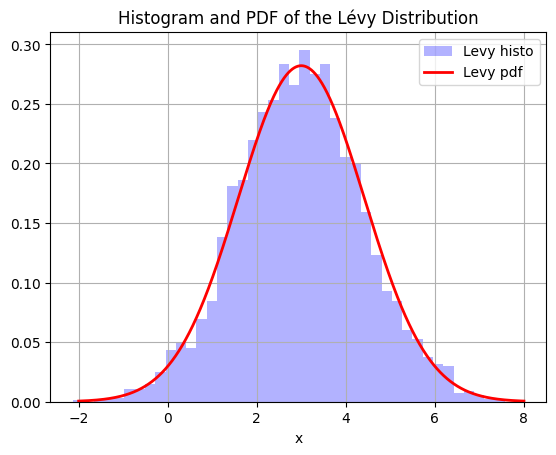

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

# Paremethers for the Lévy distribution
alpha = 2  # Heavy tail parameter
beta = 0  # Skewness parameter
m = 3.0  # Media
size = 4000  # Number of samples



# Generate samples from the Lévy distribution
samples = levy_stable.rvs(alpha, beta, loc=m, size=size)

# Create the histogram of the samples
plt.hist(samples, bins='auto', density=True, alpha=0.3, color='b', label='Levy histo')

# Generate the PDF of the Lévy distribution
x = np.linspace(-2, 8, size)
y = levy_stable.pdf(x, alpha, beta, loc=m)

# Plot the PDF
plt.plot(x, y, 'r-', lw=2, label='Levy pdf')

# Add title and labels to the plot
plt.title("Histogram and PDF of the Lévy Distribution")
plt.xlabel("x")
plt.legend()
plt.grid()

# Show the plot
plt.show()

**Activity 4:** Lévy flight - Vec2d - 1 Trajecotry (**5 pts**)
- Generate a **Lévy flight** trajectory.
- Implement usign **Vec2d** class.
- Keep the trajectory in a **numpy** array
- Visualize trajectory using **plotly** - 3D projection

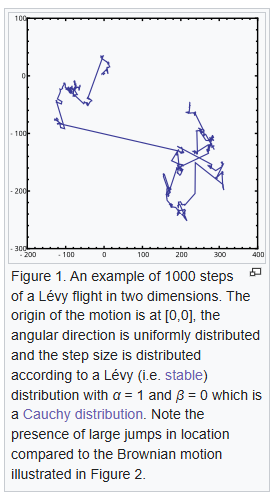

Wikipedia contributors. (2025, 13 febrero). Lévy flight. Wikipedia. https://en.wikipedia.org/wiki/L%C3%A9vy_flight

In [60]:
num_steps = 1000 # Number of steps in the trajectory
speed = 10 
time_per_step = 1.5 # Time to reach the next point

# Parameters for the Lévy distribution
alpha = 1 # Stability parameter (0 < alpha <= 2)
beta = 0 # Skewness parameter
m = 0 # Media

# Initialize trajectory array with zeros
# The array has dimensions (num_steps, 3)
# - num_steps: Number of steps
# - 3: Represents the (x, y, time) coordinates for each step
trajectory = np.zeros((num_steps, 3))


# Init velocity vector
velocity = Vec2d(speed,0)

for i in range(1, num_steps):
    # The step length is drawn from a Lévy distribution
    step_length = levy_stable.rvs(alpha,beta)

    # The direction is uniformly distributed
    angle = np.random.uniform(-np.pi, np.pi) 
    velocity = velocity.rotated(angle)

    # Distance / velocity = time
    time = step_length / velocity.get_length() * time_per_step # Time to reach the next point

    trajectory[i] = (trajectory[i - 1] + np.array([
                                                    velocity.x * step_length, 
                                                    velocity.y * step_length, 
                                                    time
                                                ]))

# Graficar la trayectoria
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=trajectory[:, 0], y=trajectory[:, 1], z=trajectory[:, 2], mode='lines', name='Trajectory'))
fig.update_layout(title='Correlated Random Walk', scene=dict(xaxis_title='X_POS', yaxis_title='Y_POS', zaxis_title='Time'))
fig.show()

**Activity 5:** Correlated Random Walk - Vec2d - N Trajectories (**5 pts**)
- Generate as many **CRW** trajectories as specified on a control variable **n_traj**.
- Each of the trajectories should be generated using a unique Cauchy coefficient.
- Implement usign **Vec2d** class.
- Visualize trajectories using **plotly** - 3D projection

In [ ]:
# Coefficients for the Cauchy distribution
cauchy_coefficients = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 0.99]

# The Cauchy distribution is used to generate rotation angles for the correlated random walk.
# The coefficients control the "heaviness" of the tails of the distribution, which affects the likelihood of large rotations.
# Coefficients from 0.2 to 0.99 were defined to visualize the variation of the rotations that may have occurred.

n_traj = len(cauchy_coefficients)  # Number of trajectories
num_steps = 1000  # Number of steps in each trajectory
speed = 10  # Constant speed of the walker

time_per_step = 0.5  # Time elapsed per step

# Initialize trajectories array with zeros
# The array has dimensions (n_traj, num_steps, 3), where:
# - n_traj: Number of trajectories
# - num_steps: Number of steps in each trajectory
# - 3: Represents the (x, y, time) coordinates for each step
trajectories = np.zeros((n_traj, num_steps, 3))

# Loop over each Cauchy coefficient to generate a unique trajectory
for iter, coefficient in enumerate(cauchy_coefficients):
    # Initialize velocity vector for each trajectory
    velocity = Vec2d(speed, 0)

    # Loop over each step in the trajectory
    for j in range(1, num_steps):
        # Generate a rotation angle from the wrapped Cauchy distribution
        # The coefficient determines the spread of the angles
        angle = wrapcauchy.rvs(coefficient)

        # Rotate the velocity vector by the generated angle
        velocity = velocity.rotated(angle)

        # The new position is the previous position plus the displacement caused by the velocity
        trajectories[iter, j] = (trajectories[iter, j - 1] + np.array([
                                                                velocity.x, 
                                                                velocity.y, 
                                                                velocity.get_length() * time_per_step
                                                            ]))

# Plot trajectories in 3D using Plotly
fig = go.Figure()

# Loop over each trajectory and add it to the 3D plot
for iter, coefficient in enumerate(cauchy_coefficients):
    fig.add_trace(go.Scatter3d(
        x=trajectories[iter, :, 0],  
        y=trajectories[iter, :, 1],  
        z=trajectories[iter, :, 2],  
        mode='lines',  
        name=f'CRW, Cauchy {coefficient}'  
    ))

# Update the layout of the plot
fig.update_layout(
    title='Correlated Random Walk',  
    scene=dict(
        xaxis_title='X',  
        yaxis_title='Y', 
        zaxis_title='Time' 
    )
)

# Display the plot
fig.show()